In [ ]:
!pip install tweepy

In [ ]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem. porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
consumer_key = 'uUbVPTmtKMBB8i4DZDWAsxcGD'
consumer_secret = 'WtrK8VKbC9P0myQHJKneoBQzSCi8EPlxFQrJAIjxtUfUNJhDka'
access_token = '1702966795416588288-mjH1BZfdYfjbPmRprA5X6LzvSeMts6'
access_token_secret = '9lZ2bdQNleszmrPo0eomMoA1AjdFEjcerUFGTzsBB4GUu'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token (access_token, access_token_secret)
api = tw. API (auth, wait_on_rate_limit=True)

In [ ]:
#public_tweets = api.home_timeline()
public_tweets = api.user_timeline(screen_name="@iamsrk", count=10)  # Adjust the count as needed
for tweet in public_tweets:
  print(tweet.text)

Forbidden: ignored

In [ ]:
# Print multiple statements in same line

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_excel('amazon.xlsx')
df.head()

,review_profile_name,review_rating,review_title,review_body,review_link,review_context
0,Jesse jay,4.0,I am glad I purchased I love these the color a...,I was a little spectacle about purchasing base...,/gp/customer-reviews/R2ZGGB510T6MZZ?ASIN=B075L...,"Reviewed in the United States on February 14, ..."
1,CandDwoody,4.0,Great value,It's hard finding the right color and long las...,/gp/customer-reviews/R3OWW0L8NOB9RJ?ASIN=B075L...,"Reviewed in the United States on March 29, 2020"
2,Donna,5.0,Pros and cons..,Pros- I put them on and let them dry.I can kis...,/gp/customer-reviews/R29A52RTOMEO1W?ASIN=B075L...,"Reviewed in the United States on March 4, 2018"
3,Kelsi Burkholder,4.0,I have been very pleased with this matte color...,I have been very pleased with this matte color...,/gp/customer-reviews/R2DZNESM3EA5T2?ASIN=B075L...,"Reviewed in the United States on April 11, 2018"
4,Judy Carter,3.0,Could be better,Product wasn't what I was expecting.A few of t...,/gp/customer-reviews/R1SQS91ZQV1611?ASIN=B075L...,"Reviewed in the United States on October 3, 2021"


In [ ]:
tweets = df['review_body']
type(tweets)

pandas.core.series.Series

In [ ]:
tweets[0:2]

0    I was a little spectacle about purchasing base...
1    It's hard finding the right color and long las...
Name: review_body, dtype: object

In [ ]:
len(tweets)

81

In [ ]:
corpus = [] # Form an empty list called corpus
ps = PorterStemmer () # For stemming the words to original form, for example- "running to run"
stop_words = set (stopwords.words ('english')) # remove words such as will, I, and, at etc.

for i in range(0, len(tweets)): # Iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",' ', str(tweets[i]))
  # Convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # Split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # Remove English stopwords
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # Stem words to the baseform
  #tweets_text_cln [ps.stem(x) for x in tweets_text_cln]
  #join words to form the original sentences, but cleaned-up
  tweets_text_cln=" ".join(tweets_text_cln)
  # Append to the list to get all tweets in one place
  corpus.append(tweets_text_cln)

In [ ]:
print("Before\n")
print(tweets)

Before

0     I was a little spectacle about purchasing base...
1     It's hard finding the right color and long las...
2     Pros- I put them on and let them dry.I can kis...
3     I have been very pleased with this matte color...
4     Product wasn't what I was expecting.A few of t...
                            ...                        
76                Colors are much lighter than pictures
77    DisgustingNot even worth the price u know how ...
78                   Pretty colors but didn't last long
79    Great quality. I always get compliments when I...
80             These are great velvet matte lipglosses.
Name: review_body, Length: 81, dtype: object


In [ ]:
print("After\n")
corpus

After



['little spectacle purchasing based reviews glad purchased love color extremely pigmented dry matte pretty fast little matte matte lips feel bit like chalk mind lips become chapped lippies flaky matte sticky long lasting whoever stay ur salvia drinking eating take pigment hours need reapply would recommend price grest product individually wrapped plus swatches order left right also last pic tried washing twice soap update since purchased tried lippies several flake several wan sure formula different darkest red darkest brown flake dropped star',
 'hard finding right color long lasting tried kylie jenner lip color shade purchased came right returned tried half price got selection colors found perfect shade lasted hours longer half price doesnt last day dry stay think u need dryness love',
 'pros put let dry kiss husband whole time love colors dark small putin pocket reapply feel needcon dry make lips look chapped sometimes put gloss also feel like wearing different colors stains lips th

In [ ]:
len(corpus)

81

In [ ]:
bagofwords = []
for i in range(0, len(corpus)):
  words = corpus[i].split()
  bagofwords.append(words)

In [ ]:
bagofwords[0]

['little',
 'spectacle',
 'purchasing',
 'based',
 'reviews',
 'glad',
 'purchased',
 'love',
 'color',
 'extremely',
 'pigmented',
 'dry',
 'matte',
 'pretty',
 'fast',
 'little',
 'matte',
 'matte',
 'lips',
 'feel',
 'bit',
 'like',
 'chalk',
 'mind',
 'lips',
 'become',
 'chapped',
 'lippies',
 'flaky',
 'matte',
 'sticky',
 'long',
 'lasting',
 'whoever',
 'stay',
 'ur',
 'salvia',
 'drinking',
 'eating',
 'take',
 'pigment',
 'hours',
 'need',
 'reapply',
 'would',
 'recommend',
 'price',
 'grest',
 'product',
 'individually',
 'wrapped',
 'plus',
 'swatches',
 'order',
 'left',
 'right',
 'also',
 'last',
 'pic',
 'tried',
 'washing',
 'twice',
 'soap',
 'update',
 'since',
 'purchased',
 'tried',
 'lippies',
 'several',
 'flake',
 'several',
 'wan',
 'sure',
 'formula',
 'different',
 'darkest',
 'red',
 'darkest',
 'brown',
 'flake',
 'dropped',
 'star']

In [ ]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonaly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['little', 'spectacle', 'purchasing', 'based', 'reviews', 'glad', 'purchased', 'love', 'color', 'extremely']

Most commonaly occuring words and frequency



[('colors', 46),
 ('like', 30),
 ('lips', 29),
 ('matte', 20),
 ('color', 19),
 ('long', 17),
 ('product', 17),
 ('love', 14),
 ('dry', 14),
 ('lipstick', 14),
 ('would', 12),
 ('price', 11),
 ('stay', 10),
 ('get', 10),
 ('feel', 9),
 ('last', 9),
 ('good', 9),
 ('sticky', 8),
 ('lip', 8),
 ('put', 8)]

In [ ]:
words_to_remove = ['product', 'would', 'lipstick','put','get']
bagsofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [ ]:
all_words = list(itertools.chain(*bagsofwords_new))
print(all_words[0:10])
print()
print("Most commonaly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['little', 'spectacle', 'purchasing', 'based', 'reviews', 'glad', 'purchased', 'love', 'color', 'extremely']

Most commonaly occuring words and frequency



[('colors', 46),
 ('like', 30),
 ('lips', 29),
 ('matte', 20),
 ('color', 19),
 ('long', 17),
 ('love', 14),
 ('dry', 14),
 ('price', 11),
 ('stay', 10),
 ('feel', 9),
 ('last', 9),
 ('good', 9),
 ('sticky', 8),
 ('lip', 8),
 ('great', 8),
 ('nice', 8),
 ('different', 7),
 ('time', 7),
 ('lasting', 6)]

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20), columns=['Words', 'Freq'])
freq_word_df.head()

,Words,Freq
0,colors,46
1,like,30
2,lips,29
3,matte,20
4,color,19


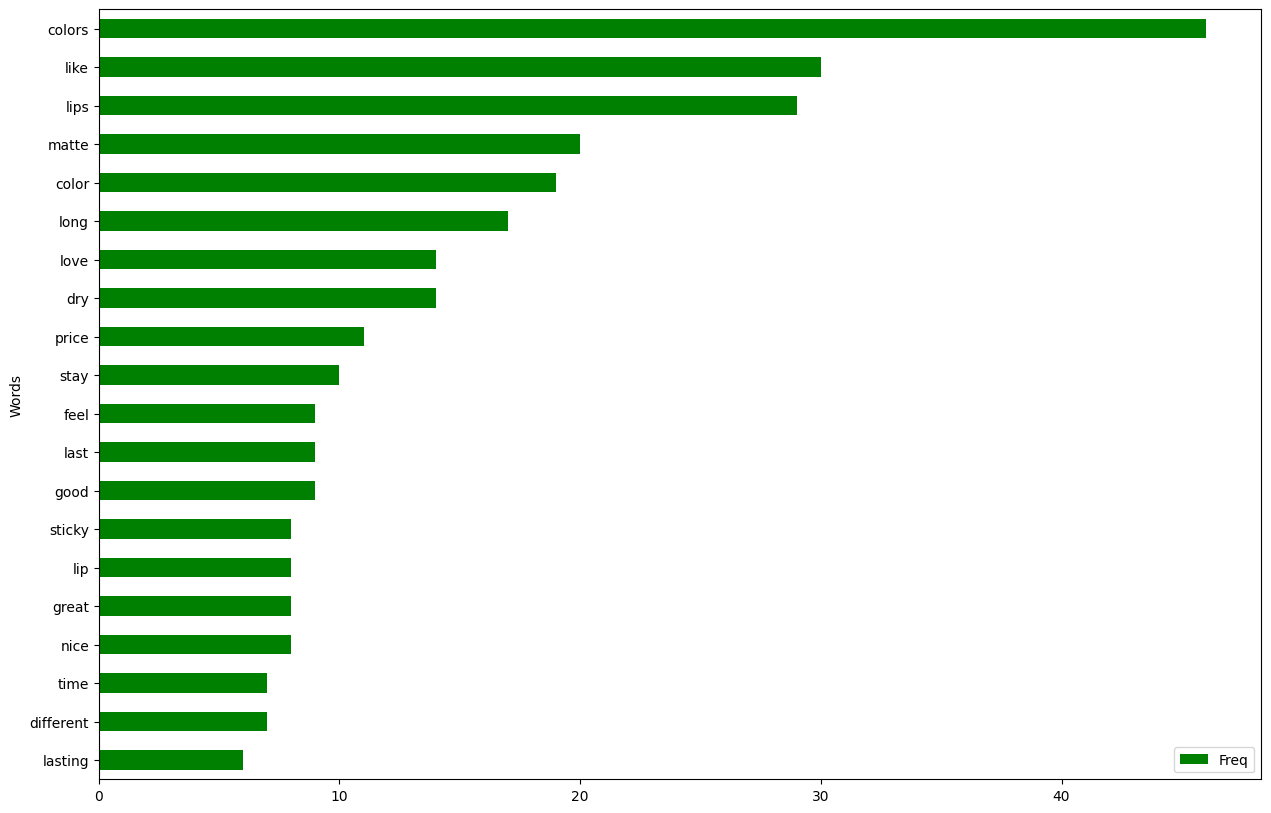

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by = 'Freq').plot.barh(x= 'Words', y ='Freq', ax=ax, color="green" )
plt.show();

<Figure size 1000x1000 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

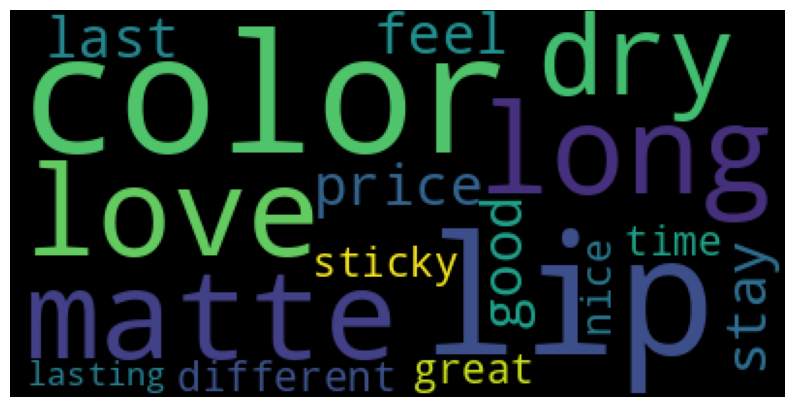

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_string=" ".join(freq_word_df.Words)
wordcloud = WordCloud (#stopwords=STOPWORDS,
                       background_color='black',
                       max_words=20).generate (word_string)
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
sentiment_text = [TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.07095238095238096
little spectacle purchasing based reviews glad purchased love color extremely pigmented dry matte pretty fast little matte matte lips feel bit like chalk mind lips become chapped lippies flaky matte sticky long lasting whoever stay ur salvia drinking eating take pigment hours need reapply would recommend price grest product individually wrapped plus swatches order left right also last pic tried washing twice soap update since purchased tried lippies several flake several wan sure formula different darkest red darkest brown flake dropped star


In [ ]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['Polarity',"Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending=False)

,Polarity,Tweet_Text
23,1.000,perfect post office put deliver package yester...
80,0.800,great velvet matte lipglosses
72,0.800,great product
53,0.600,colors good dries many lips
50,0.575,none colors suitable nice someone else
...,...,...
14,-0.500,like smeared teeth difficult remove yet lips w...
73,-0.700,ordered mom like smell bad like gasoline somet...
67,-0.800,lipstick comes immediately gets sticky like gl...
43,-0.900,dislike way feels cruddy


array([<Axes: title={'center': 'Polarity'}>], dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Lipstick')

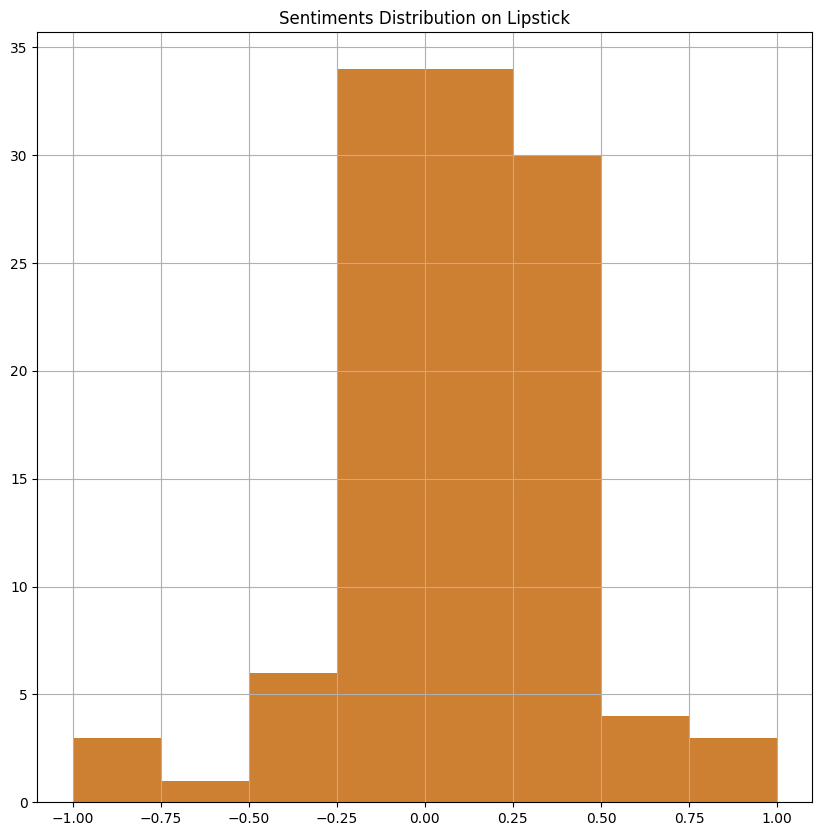

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="#CD7F32")
plt.title("Sentiments Distribution on Lipstick")
plt.show()